In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('Sleep_Efficiency.csv')
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [2]:
numerik_df = df.select_dtypes(include=[np.number])
display(numerik_df.head(10))

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
0,1,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0
1,2,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0
2,3,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0
3,4,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0
4,5,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0
5,6,36,7.5,0.90,23,60,17,0.0,NaN,0.0,1.0
6,7,27,6.0,0.54,28,25,47,2.0,50.0,0.0,1.0
7,8,53,10.0,0.90,28,52,20,0.0,50.0,0.0,3.0
8,9,41,6.0,0.79,28,55,17,3.0,50.0,0.0,1.0
9,10,11,9.0,0.55,18,37,45,4.0,0.0,0.0,0.0


In [3]:
print(f"Jumlah record (baris): {df.shape[0]}")
print(f"Jumlah attribute (kolom): {df.shape[1]}")
print(f"Nama attribute: {list(df.columns)}")
print(f"Jumlah attribute numerik: {len(numerik_df.columns)}")

Jumlah record (baris): 452
Jumlah attribute (kolom): 15
Nama attribute: ['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
Jumlah attribute numerik: 11


In [4]:
kategori_df = df.select_dtypes(include=['object'])
for col in kategori_df.columns:
    print(f"{col} : {df[col].nunique()} label")

Gender : 2 label
Bedtime : 424 label
Wakeup time : 434 label
Smoking status : 2 label


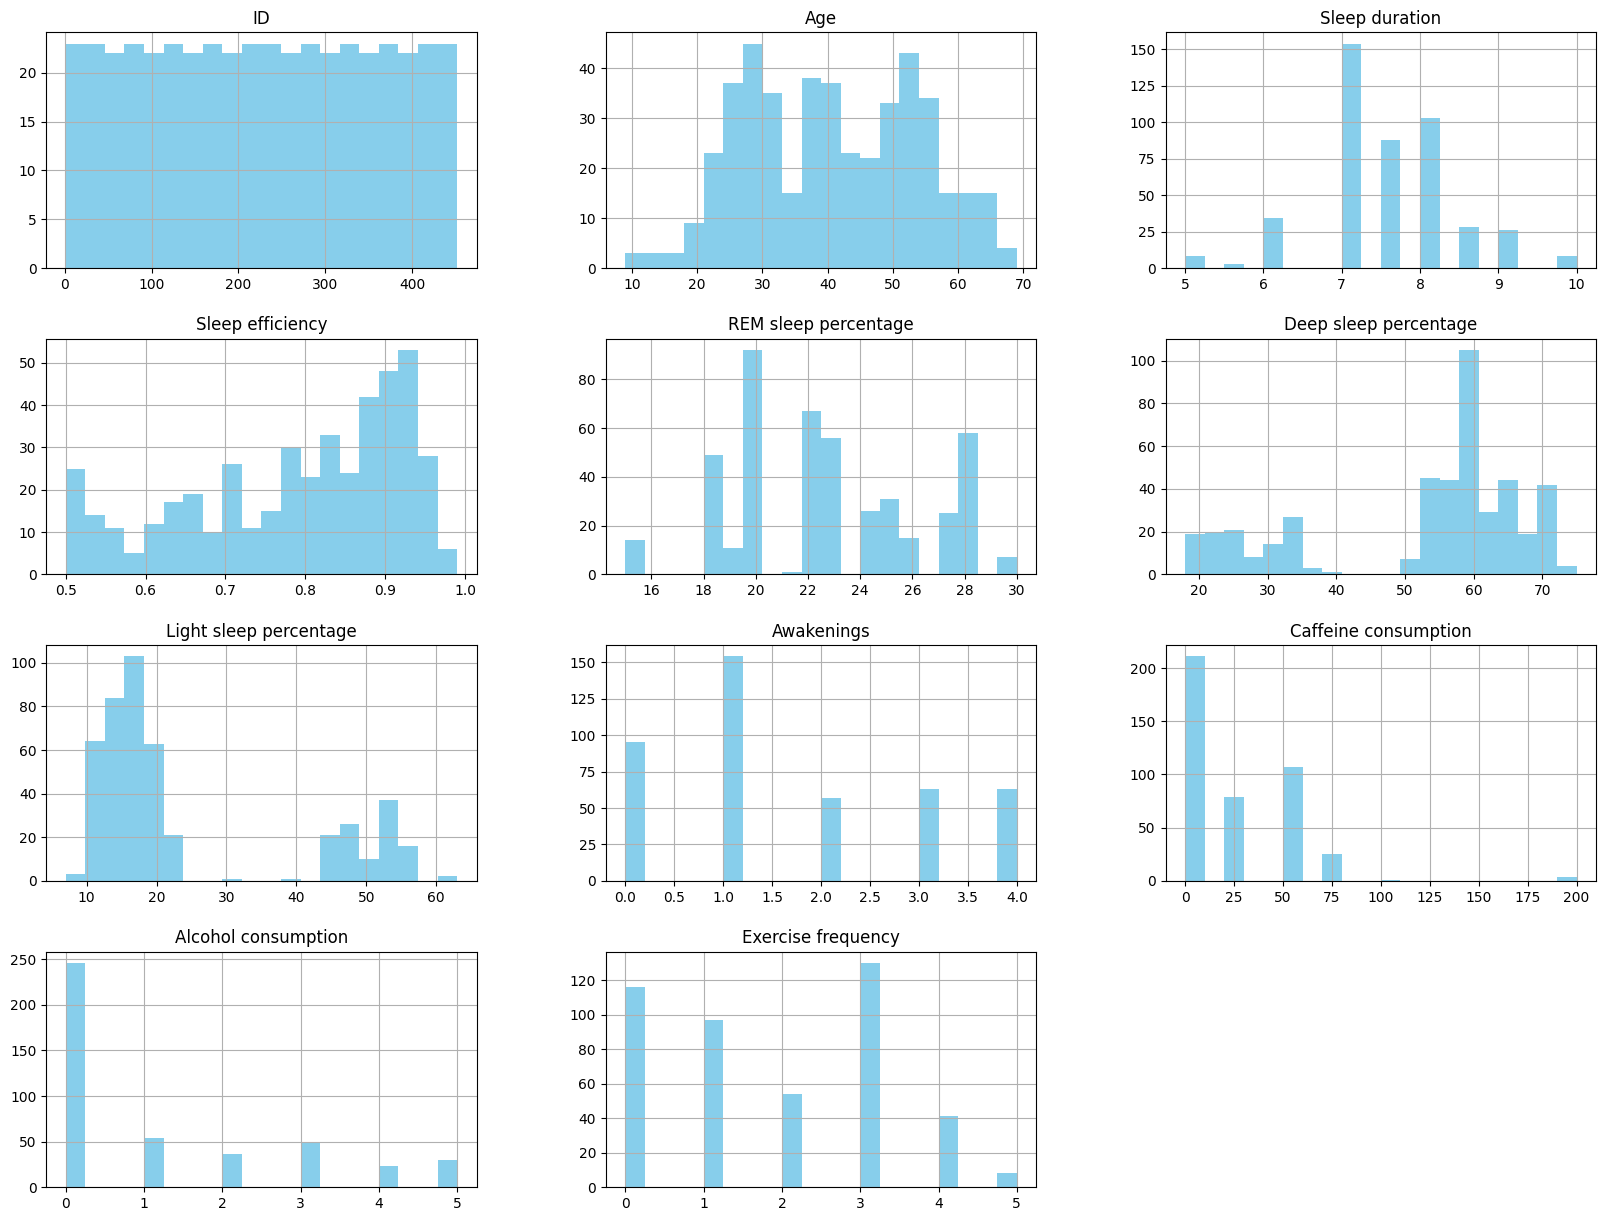

In [5]:
x = df.hist(bins=20, figsize=(20, 15), color='skyblue')
plt.show()

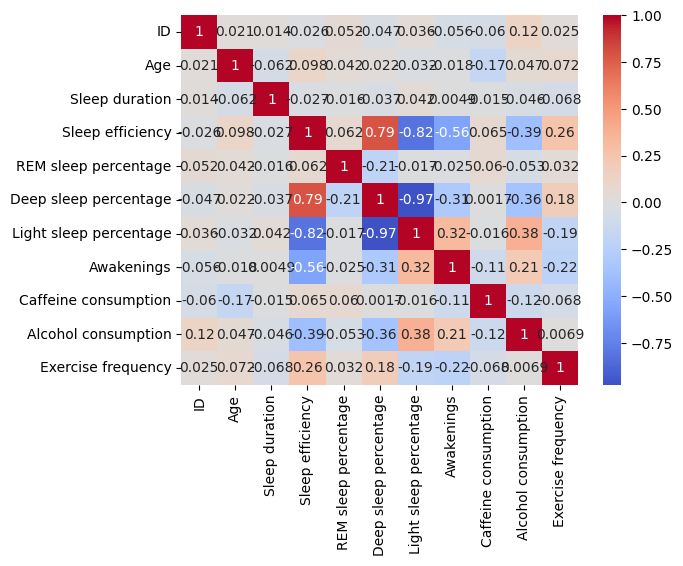

In [6]:
cor_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(cor_matrix, cmap='coolwarm', annot=True, center=0)
plt.show()

## Kesimpulan Analisis dan Visualisasi Data Sleep Efficiency

1. **Statistik Deskriptif**  
   - Dari perhitungan statistik (`mean`, `std`, `min`, `max`, Q1, Q2, Q3), rata-rata **durasi tidur** adalah sekitar 7–8 jam dengan efisiensi tidur rata-rata sekitar 79%.  
   - Nilai minimum dan maksimum menunjukkan adanya variasi besar, misalnya ada efisiensi tidur sangat rendah (50%) hingga sangat tinggi (99%).  

2. **Record Pertama Atribut Numerik**  
   - Dari 10 record pertama terlihat data numerik sudah sesuai dengan deskripsi statistik, misalnya durasi tidur sebagian besar di atas 6 jam.  
   - Data ini memberi gambaran awal bagaimana pola tidur tiap individu.

3. **Informasi Dataset**  
   - Dataset memiliki sejumlah record (baris) dan beberapa atribut (kolom).  
   - Dari informasi jumlah atribut, terlihat bahwa sebagian besar atribut bertipe numerik, sisanya bertipe kategorikal (object).  

4. **Jumlah Label Atribut Kategorikal**  
   - Atribut kategorikal seperti **Gender**, **Smoking status**, dan **Exercise frequency** memiliki jumlah kategori tertentu.  
   - Misalnya, Gender terdiri dari 2 label, Smoking status terdiri dari beberapa label, dan Exercise frequency memiliki beberapa kategori tingkat frekuensi olahraga.  

5. **Visualisasi Histogram**  
   - Histogram menunjukkan distribusi tiap atribut numerik.  
   - Sebagian besar orang memiliki durasi tidur 7–8 jam, efisiensi tidur sekitar 70–90%.  

6. **Heatmap Korelasi**  
   - Heatmap menunjukkan **Sleep Duration** berkorelasi positif dengan **Sleep Efficiency**, artinya semakin lama tidur maka cenderung semakin efisien.  
   - Sebaliknya, **Awakenings** berkorelasi negatif dengan **Sleep Efficiency**, artinya semakin sering terbangun maka efisiensi tidur menurun.  
   - Variabel gaya hidup seperti konsumsi kafein, alkohol, dan olahraga memiliki korelasi yang lemah terhadap efisiensi tidur.



Secara keseluruhan, kualitas tidur dalam dataset ini dipengaruhi terutama oleh **durasi tidur** dan **frekuensi terbangun**, sementara faktor gaya hidup lain memberikan pengaruh yang lebih lemah. Distribusi data juga menunjukkan bahwa mayoritas orang tidur cukup lama dengan efisiensi yang cukup baik.


------------------------------------------------------------ DATA CLEANING ------------------------------------------------------------

In [7]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Mengecek jumlah missing value di setiap kolom untuk mengetahui apakah ada data yang hilang.

In [8]:
# Handling missing value
df = df.dropna(subset=['Awakenings'])
df = df.dropna(subset=['Caffeine consumption'])
df = df.dropna(subset=['Alcohol consumption'])
df = df.dropna(subset=['Exercise frequency'])
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

Menghapus baris yang memiliki missing value di kolom penting, agar model atau analisis tidak terganggu oleh data yang kosong, yang bisa menyebabkan error.

In [9]:
# Handling duplicate value
# Melihat jumlah duplicate value
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


Mengecek jumlah record yang duplikat, karena bisa mempengaruhi distribusi data dan hasil analisis, sehingga perlu diidentifikasi dan dihapus bila perlu.

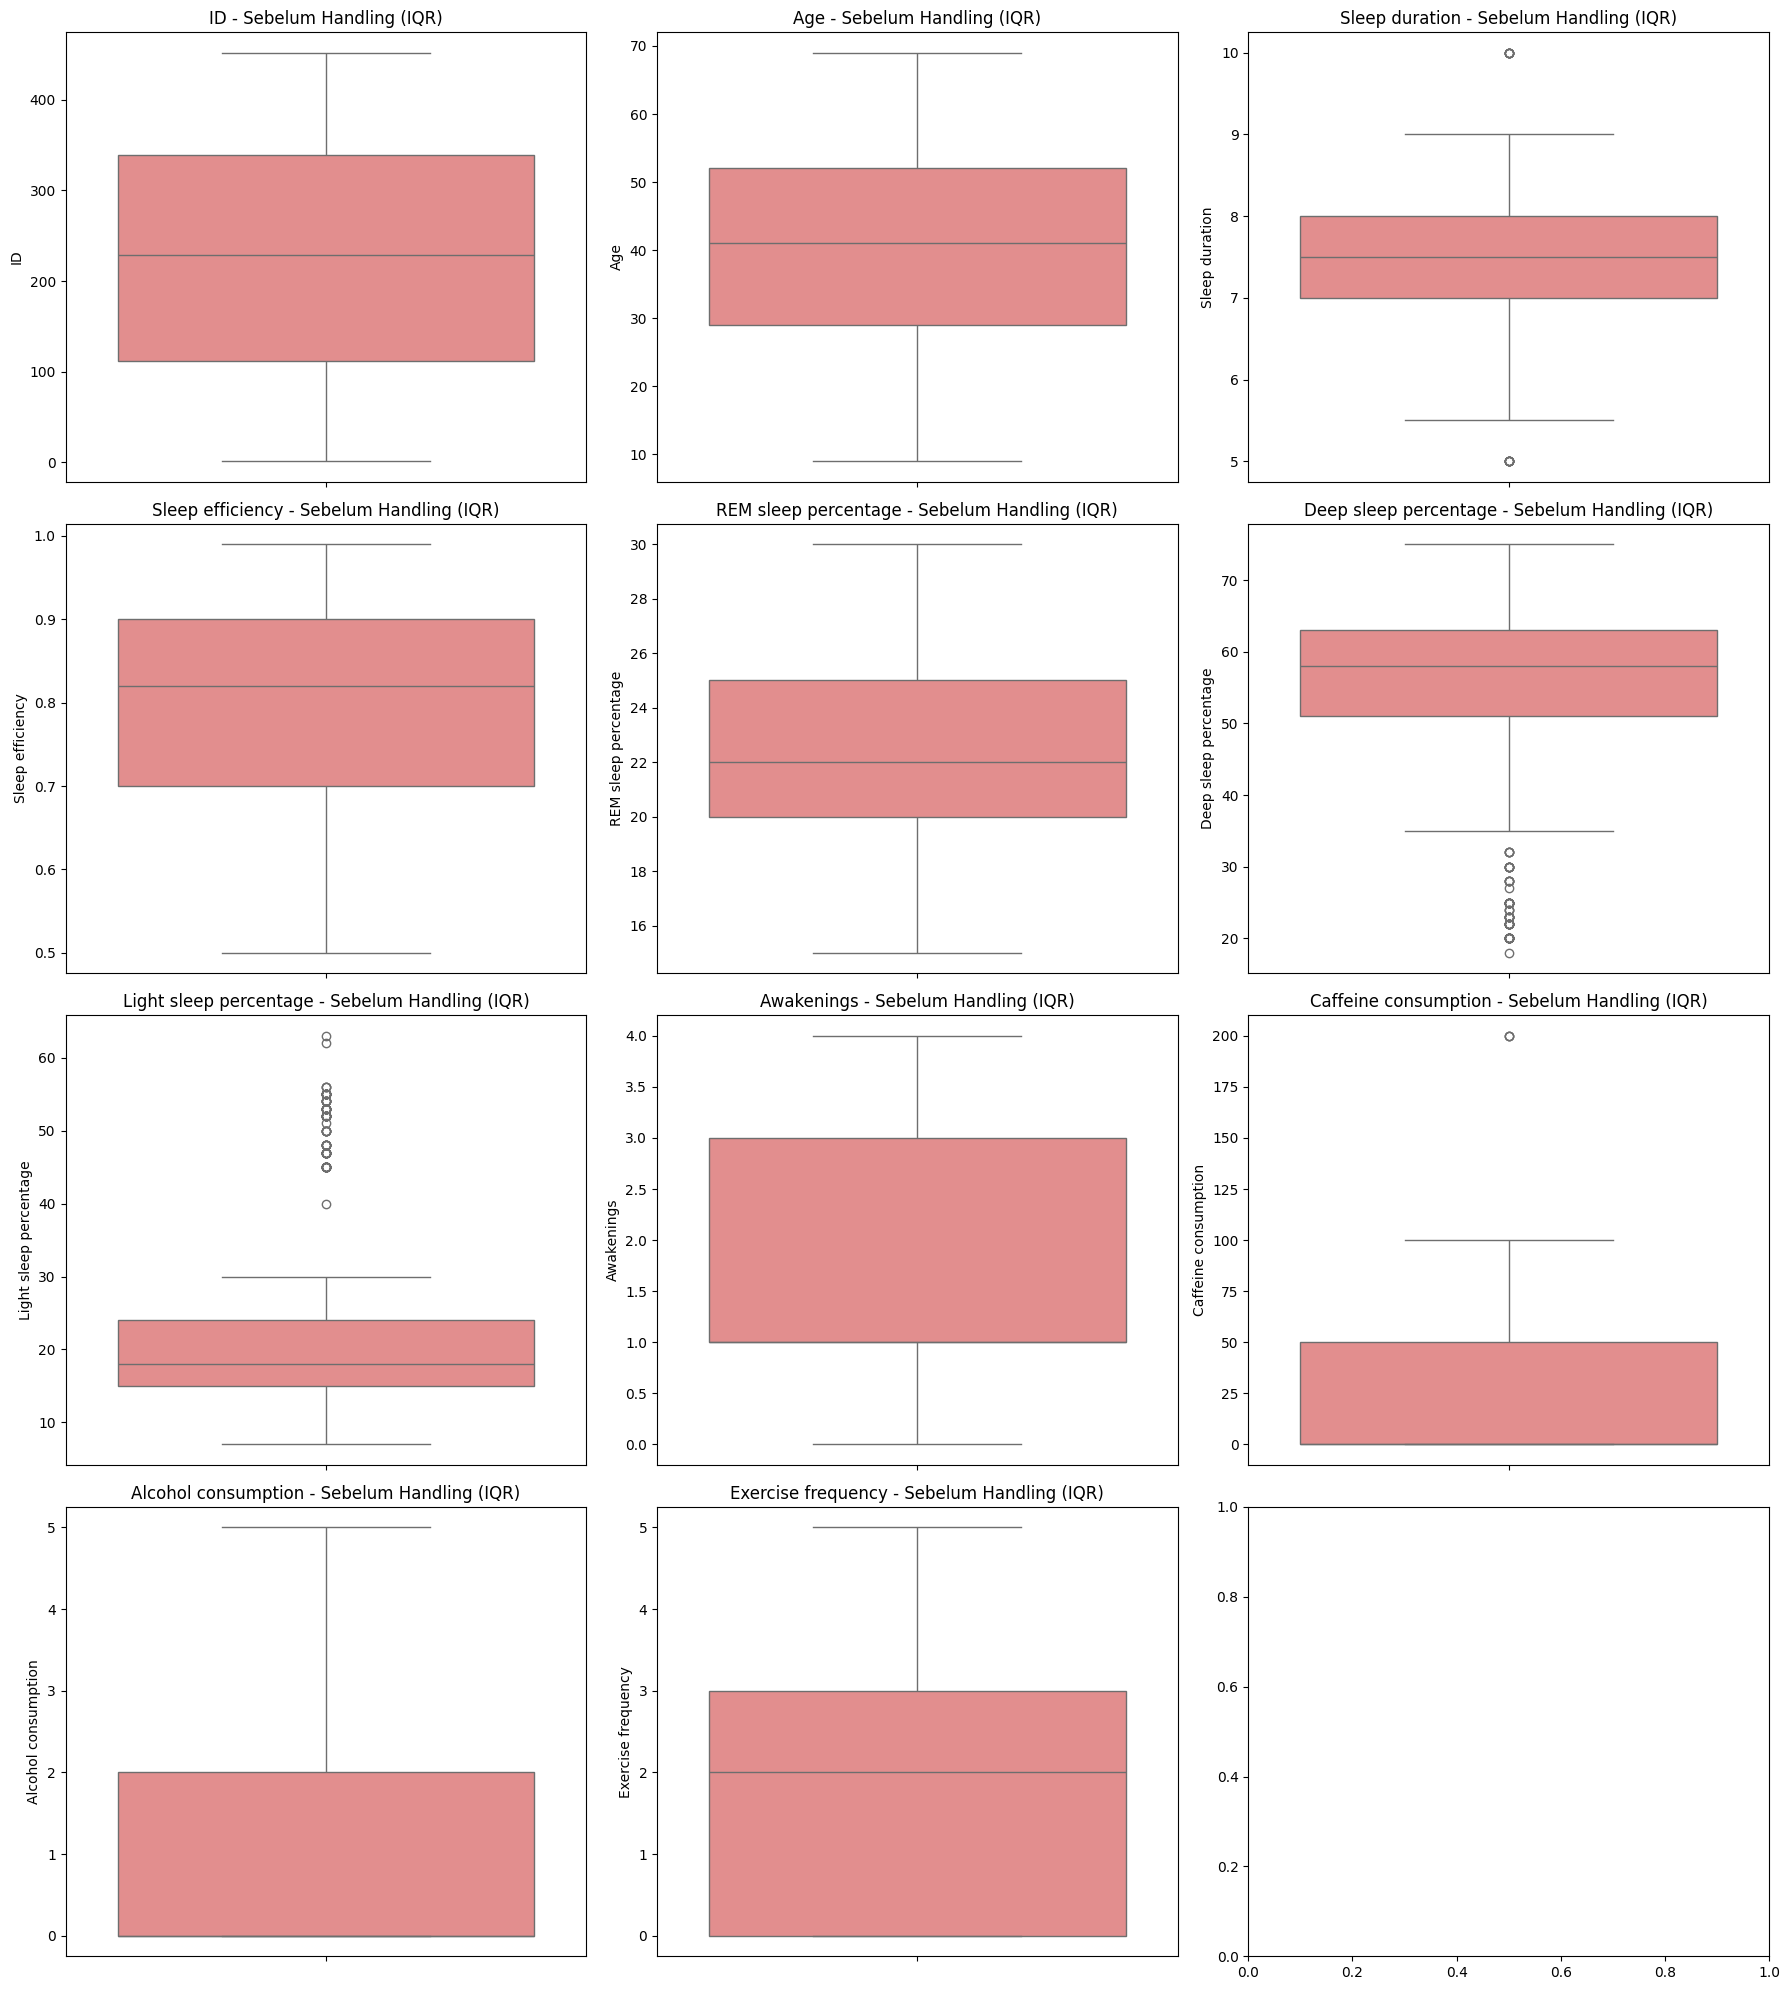

ID: nilai dibatasi ke [-229.5 , 680.5]
Age: nilai dibatasi ke [-5.5 , 86.5]
Sleep duration: nilai dibatasi ke [5.5 , 9.5]
Sleep efficiency: nilai dibatasi ke [0.4 , 1.2]
REM sleep percentage: nilai dibatasi ke [12.5 , 32.5]
Deep sleep percentage: nilai dibatasi ke [33.0 , 81.0]
Light sleep percentage: nilai dibatasi ke [1.5 , 37.5]
Awakenings: nilai dibatasi ke [-2.0 , 6.0]
Caffeine consumption: nilai dibatasi ke [-75.0 , 125.0]
Alcohol consumption: nilai dibatasi ke [-3.0 , 5.0]
Exercise frequency: nilai dibatasi ke [-4.5 , 7.5]


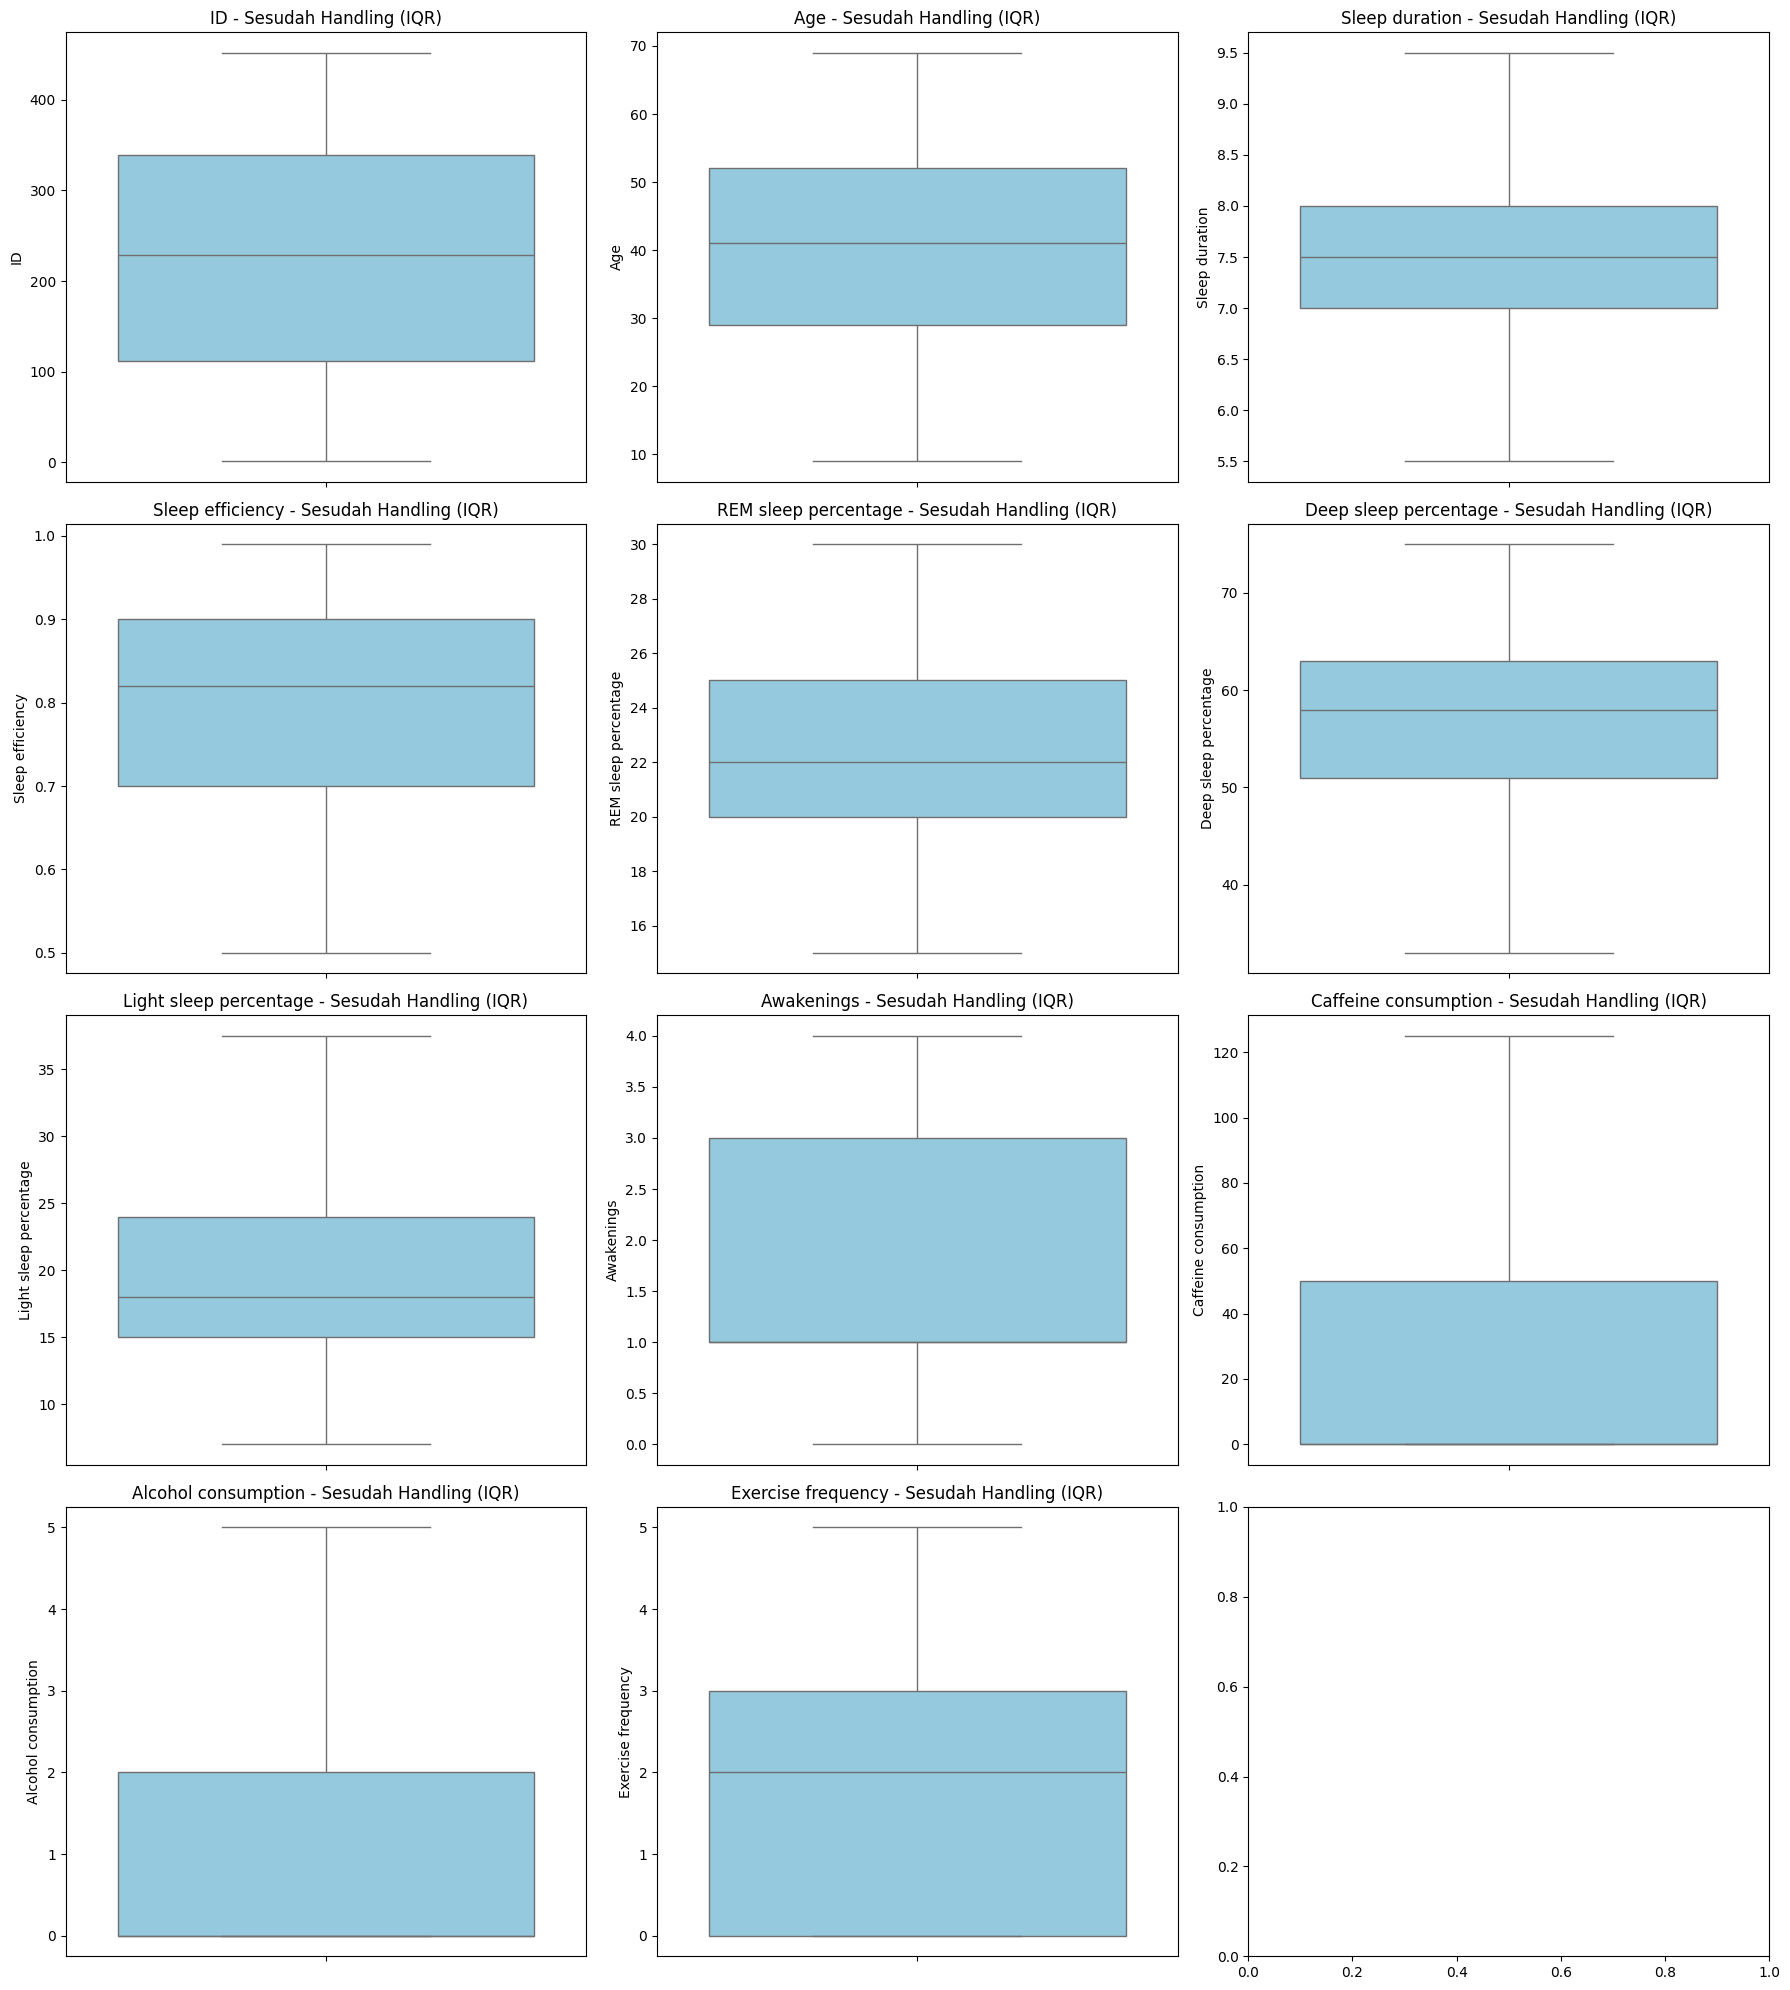


=== Jumlah Outlier Setelah Handling (IQR) ===
Kolom: ID, Jumlah outlier: 0
Kolom: Age, Jumlah outlier: 0
Kolom: Sleep duration, Jumlah outlier: 0
Kolom: Sleep efficiency, Jumlah outlier: 0
Kolom: REM sleep percentage, Jumlah outlier: 0
Kolom: Deep sleep percentage, Jumlah outlier: 0
Kolom: Light sleep percentage, Jumlah outlier: 0
Kolom: Awakenings, Jumlah outlier: 0
Kolom: Caffeine consumption, Jumlah outlier: 0
Kolom: Alcohol consumption, Jumlah outlier: 0
Kolom: Exercise frequency, Jumlah outlier: 0

✅ Data hasil handling outlier (IQR) telah disimpan sebagai 'Sleep_Efficiency_Clean.csv'


In [10]:
# Handling outlier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Copy dataset biar data asli tidak berubah
df_iqr = df.copy()
numerik_df = df.select_dtypes(include=['number'])

# ------------------------------------------
#  Visualisasi Boxplot Sebelum Handling
# ------------------------------------------
n_cols = len(numerik_df.columns)
n_rows = int(np.ceil(n_cols / 3))
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerik_df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f"{col} - Sebelum Handling (IQR)")
plt.tight_layout()
plt.show()

# ------------------------------------------
#  Handling Outlier dengan Metode IQR
# ------------------------------------------
for col in numerik_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Batasi nilai di luar rentang IQR
    df_iqr[col] = np.where(df[col] < lower, lower,
                          np.where(df[col] > upper, upper, df[col]))
    print(f"{col}: nilai dibatasi ke [{round(lower,2)} , {round(upper,2)}]")

# ------------------------------------------
#  Visualisasi Boxplot Sesudah Handling
# ------------------------------------------
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerik_df.columns):
    sns.boxplot(y=df_iqr[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} - Sesudah Handling (IQR)")
plt.tight_layout()
plt.show()

# ------------------------------------------
#  Deteksi Outlier Setelah Handling
# ------------------------------------------
print("\n=== Jumlah Outlier Setelah Handling (IQR) ===")
for col in numerik_df.columns:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_iqr[(df_iqr[col] < lower) | (df_iqr[col] > upper)]
    print(f"Kolom: {col}, Jumlah outlier: {len(outliers)}")

df_iqr.to_csv('Sleep_Efficiency_Clean.csv', index=False)
print("\n✅ Data hasil handling outlier (IQR) telah disimpan sebagai 'Sleep_Efficiency_Clean.csv'")

Menggunakan Interquartile Range (IQR) untuk mendeteksi dan menangani outlier.
Nilai yang berada di luar batas bawah/atas digantikan dengan batas minimum/maksimum IQR.

------------------------------------------------------------ STANDARISASI ------------------------------------------------------------

In [11]:
scaler = StandardScaler()
#Numerical Columns
num_col = [col for col in df_iqr.select_dtypes(include='number').columns if col.lower() != 'id']
x1 = df_iqr[num_col]
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col)

x1.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
0,1.805639,-1.746276,0.669567,-1.366110,1.229089,-0.951708,-1.195204,-0.849898,-0.712049,0.859132
1,2.104460,-0.543871,-0.953672,-1.074232,-1.681634,1.652330,1.020111,-0.849898,1.150480,0.859132
2,-0.061998,0.658533,0.743351,-0.782354,1.229089,-1.155947,-0.456766,-0.849898,-0.712049,0.859132
3,-0.061998,-1.746276,-2.060427,0.093281,-1.681634,1.652330,1.020111,1.072904,2.392165,-0.524035
4,1.207995,0.658533,-0.215836,1.260793,0.049066,-0.338993,1.020111,-0.849898,1.150480,0.859132


Membuat semua kolom numerik berada pada skala yang sama.  
Menggunakan StandardScaler untuk mengubah kolom numerik menjadi rata-rata 0 dan standar deviasi 1.

Kolom dengan skala berbeda (misal umur vs konsumsi kafein) bisa mendominasi model jika tidak dinormalisasi. Standarisasi membuat model lebih stabi

--------------------------------------------------------------- ENCODING ---------------------------------------------------------------

In [12]:
kategori_df = df_iqr.select_dtypes(include=['object'])
if len(kategori_df.columns) > 0:
    df_iqr = pd.get_dummies(df_iqr, columns=kategori_df.columns)
df_iqr.head()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,...,Wakeup time_2021-12-24 09:00:00,Wakeup time_2021-12-25 05:30:00,Wakeup time_2021-12-29 05:30:00,Wakeup time_2021-12-29 07:30:00,Wakeup time_2021-12-29 08:30:00,Wakeup time_2021-12-30 08:00:00,Wakeup time_2021-12-31 04:00:00,Wakeup time_2021-12-31 06:30:00,Smoking status_No,Smoking status_Yes
0,1.0,65.0,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,2.0,69.0,7.0,0.66,19.0,33.0,37.5,3.0,0.0,3.0,...,False,False,False,False,False,False,False,False,False,True
2,3.0,40.0,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,4.0,40.0,6.0,0.51,23.0,33.0,37.5,3.0,50.0,5.0,...,False,False,False,False,False,False,False,False,False,True
4,5.0,57.0,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,...,False,False,False,False,False,False,False,False,True,False


Mengubah kolom kategorikal menjadi format numerik dengan One-Hot Encoding, karena model ML tidak bisa langsung memproses data string, sehingga perlu diubah menjadi angka.

---------------------------------------------------------- FEATURE ENGINEERING ----------------------------------------------------------

In [13]:
if 'Deep sleep percentage' in df_iqr.columns and 'Sleep duration' in df_iqr.columns:
    df_iqr['Deep_sleep_ratio'] = df_iqr['Deep sleep percentage'] / df_iqr['Sleep duration']
df_iqr.head()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,...,Wakeup time_2021-12-25 05:30:00,Wakeup time_2021-12-29 05:30:00,Wakeup time_2021-12-29 07:30:00,Wakeup time_2021-12-29 08:30:00,Wakeup time_2021-12-30 08:00:00,Wakeup time_2021-12-31 04:00:00,Wakeup time_2021-12-31 06:30:00,Smoking status_No,Smoking status_Yes,Deep_sleep_ratio
0,1.0,65.0,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,11.666667
1,2.0,69.0,7.0,0.66,19.0,33.0,37.5,3.0,0.0,3.0,...,False,False,False,False,False,False,False,False,True,4.714286
2,3.0,40.0,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,8.750000
3,4.0,40.0,6.0,0.51,23.0,33.0,37.5,3.0,50.0,5.0,...,False,False,False,False,False,False,False,False,True,5.500000
4,5.0,57.0,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,...,False,False,False,False,False,False,False,True,False,6.875000


Menambahkan informasi baru dari data yang ada untuk meningkatkan kualitas model.  Feature baru dapat memberikan insight tambahan bagi model untuk mengenali pola tidur secara lebih akurat.

------------------------------------------------------------ SPLITTING DATA ------------------------------------------------------------

In [14]:
if 'Sleep efficiency' in df_iqr.columns:

    X = df_iqr.drop('Sleep efficiency', axis=1)
    y = df_iqr['Sleep efficiency']

    # Membagi data menjadi data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Melihat dimensi data hasil splitting
    print('Dimensi X train :', X_train.shape)
    print('Dimensi X test  :', X_test.shape)
    print('Dimensi y train :', y_train.shape)
    print('Dimensi y test  :', y_test.shape)

Dimensi X train : (310, 757)
Dimensi X test  : (78, 757)
Dimensi y train : (310,)
Dimensi y test  : (78,)


Memisahkan feature (X) dan target (y).
Membagi data menjadi 80% training dan 20% testing.

Training set digunakan untuk membangun model, testing set digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat. Ini mencegah overfitting.

--------------------------------------------------------------- LINEAR REGRESSION ---------------------------------------------------------------

=== SUPPORT VECTOR REGRESSOR (SVR) ===
MAE  : 0.06636738149719888
MSE  : 0.005925200048078977
RMSE : 0.07697532103264641
R² Score: 0.7085640689972089


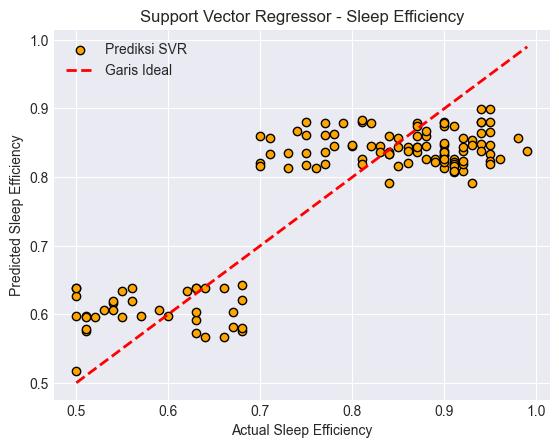

In [36]:
X_train_svr = X_train.iloc[:, :2]
X_test_svr = X_test.iloc[:, :2]

# Buat model Support Vector Regressor dengan kernel linear
svr = SVR(kernel='linear')
svr.fit(X_train_svr, y_train)

# Prediksi hasil
y_pred_svr = svr.predict(X_test_svr)

# Evaluasi model SVR
print("=== SUPPORT VECTOR REGRESSOR (SVR) ===")
print("MAE  :", mean_absolute_error(y_test, y_pred_svr))
print("MSE  :", mean_squared_error(y_test, y_pred_svr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R² Score:", r2_score(y_test, y_pred_svr))

plt.scatter(y_test, y_pred_svr, color='orange', edgecolor='black', label='Prediksi SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Ideal')
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Support Vector Regressor - Sleep Efficiency")
plt.legend()
plt.grid(True)
plt.show()


MAE (Mean Absolute Error) : 
Menunjukkan rata-rata besar kesalahan absolut antara nilai aktual dan prediksi.
Nilai yang lebih kecil berarti prediksi model semakin mendekati data sebenarnya.

MSE (Mean Squared Error) :
Menghitung rata-rata kuadrat kesalahan, memberikan penalti lebih besar pada error yang ekstrem.

RMSE (Root Mean Squared Error) : 
Akar dari MSE, menunjukkan kesalahan dalam satuan yang sama dengan target (Sleep Efficiency).

R² (R-squared) :
Mengukur seberapa besar variasi data target yang bisa dijelaskan oleh model (nilai mendekati 1 berarti model baik).

Artinya, model Linear Regression dapat menjelaskan sekitar 70% variasi data Sleep Efficiency, dengan rata-rata error prediksi sekitar 0.08.

--------------------------------------------------------------- Support Vector Regressor (SVR) ---------------------------------------------------------------

=== LINEAR REGRESSION ===
Koefisien : [-0.0010399 -0.0080941]
Intercept : 1.0410356776181042
MAE : 0.0657243338543747
MSE : 0.005871925475007453
RMSE : 0.07662848996951103
R² Score : 0.7111844235296959


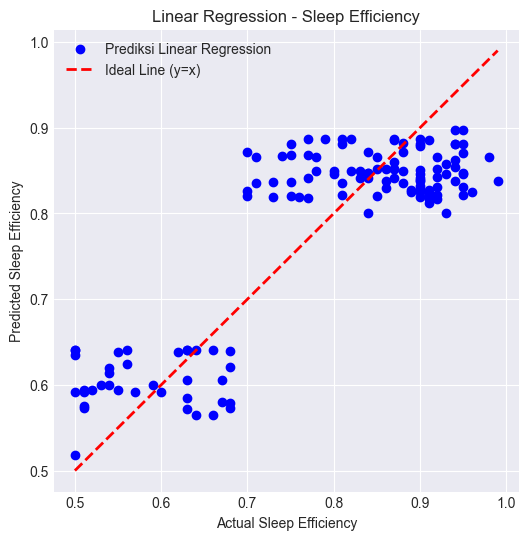

In [38]:
X = df[['Deep sleep percentage', 'Light sleep percentage']]
y = df['Sleep efficiency']

# Bagi data ke train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Prediksi hasil
y_pred_lin = reg.predict(X_test)

# Evaluasi model Linear Regression
print("=== LINEAR REGRESSION ===")
print("Koefisien :", reg.coef_)
print("Intercept :", reg.intercept_)
print("MAE :", mean_absolute_error(y_test, y_pred_lin))
print("MSE :", mean_squared_error(y_test, y_pred_lin))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R² Score :", r2_score(y_test, y_pred_lin))

# Visualisasi hasil Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Prediksi Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Line (y=x)')
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Linear Regression - Sleep Efficiency")
plt.legend()
plt.grid(True)
plt.show()


### Linear Regression 
Linear Regression adalah metode supervised learning yang digunakan untuk memprediksi nilai numerik. 
Model ini mencari hubungan linear antara variabel independen (fitur X) dan variabel dependen (label Y).

Pada dataset ini, digunakan dua fitur pertama sebagai variabel X untuk memprediksi Sleep Efficiency.
Model kemudian dievaluasi menggunakan MSE dan R² Score.

### Support Vector Regressor (SVR)
SVR adalah variasi dari Support Vector Machine (SVM) yang digunakan untuk masalah regresi. 
Berbeda dengan Linear Regression yang meminimalkan error total, SVR berusaha menjaga error dalam batas tertentu (margin). 
Kernel RBF digunakan agar model dapat menangani hubungan non-linear antara fitur dan target.

Dibandingkan dengan Linear Regression, nilai R² SVR lebih tinggi (0.79) yang berarti SVR lebih mampu menjelaskan variasi data Sleep Efficiency.
Metrik error (MAE, MSE, RMSE) juga sedikit lebih kecil, menandakan SVR memberikan prediksi yang lebih akurat.